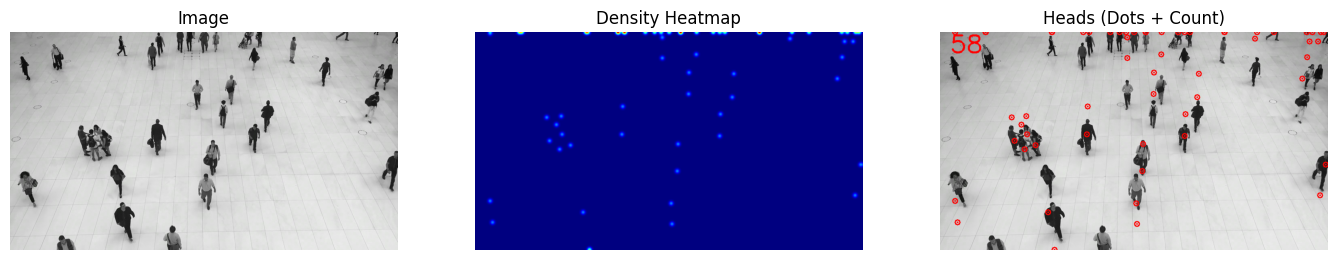

People count: 58


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

# Pick a frame
img_path = "real_world/subway_2/images/frame_00008.jpg"
npy_path = img_path.replace("images", "density").replace(".jpg", ".npy")

# Load
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
density = np.load(npy_path)

# ----- Get head dots from density map -----
# Detect local maxima (peaks)
mf = maximum_filter(density, size=7)
peaks = (density == mf) & (density > (density.max() * 0.25))   # threshold controls sensitivity

ys, xs = np.where(peaks)   # dot coordinates
count = len(xs)            # integer count

# ----- Heatmap -----
heatmap = density / (density.max() + 1e-6)
heatmap = (heatmap * 255).astype(np.uint8)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

# ----- Draw dots -----
dots_img = img.copy()
for (x, y) in zip(xs, ys):
    cv2.circle(dots_img, (x, y), 6, (255, 0, 0), 2)   # blue border
    cv2.circle(dots_img, (x, y), 2, (255, 0, 0), -1)  # red center

cv2.putText(dots_img, f"{count}", (25, 50),
            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 4)

# ----- Display -----
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
plt.title("Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Density Heatmap")
plt.imshow(heatmap)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Heads (Dots + Count)")
plt.imshow(dots_img)
plt.axis("off")

plt.show()

print("People count:", count)
